On fournit les instructions Python pour la gestion des ﬁchiers :

**f=open('fichier.txt','w')** : 'fichier.txt' désigne le nom du ﬁchier. Le mode d’ouverture peut être 'w' pour « écriture » (write), **'r'** pour« lecture » (read) ou **'a'** pour « ajout» (**append**), **f.readline()** : lecture d’une ligne du ﬁchier f

**\n** : caractère d’échappement : saut de ligne

**c1.strip()** : renvoie une chaîne sans les espaces et les caractères d’échappe-ment (saut de ligne par exemple) en début et ﬁn de la chaîne de caractères c1

**c1.split(sep=' ;')** : sépare une chaîne de caractères c1 en une liste demots avec le séparateur';' 

**f.write('exemple')** : écrit dans le ﬁchier f la chaîne de caractères'exemple'

**f.close()** : ferme le ﬁchier f

On utilisera les tableaux de type **numpy.array** et la bibliothèque **pyplot* pour les graphes :

**import numpy as np**

**import matplotlib.pyplot as plt**

1. Écrire un programme Python permettant de créer le ﬁchier 'courbe.txt'contenant les éléments suivants :
10 : nombre de points du ﬁchier

25 ;10.9 : abscisse et ordonnée du premier point

20 ;9.3

15 ;8.2

12 ;7.5

9 ;6.2

6 ;5.8

3 ;4.2

0 ;3.9

-3 ;2.8

-6 ;2 : abscisse et ordonnée du dixième point

2. Écrire un programme Python permettant d’ouvrir un ﬁchier .txt (par exemple'courbe.txt') et de récupérer les abscisses et les ordonnées dans deux tableauxde type numpy.array.

3. On cherche à modéliser les n points expérimentaux $(x_1, y_1)$, $(x_2, y_2)$...$(x_n, y_n)$ par une fonction polynôme du premier ordre, de la forme : y = ax+b. La méthodedes moindres carrés consiste à chercher les coefﬁcients a et b pour que la sommedes carrés des erreurs soit minimale.

On admet que $$a=\frac{n\sum_{i=1}^{n}x_iy_i-(\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}y_i)}{n\sum_{i=1}^{n}x_i^2 -(\sum_{i=1}^{n}x_i)^2}$$

et $b =\overline{y} − a\overline{x}$ en notant $\overline{x}$ la moyenne des $x_i$ et $\overline{y}$ la moyenne des $y_i$

Écrire un programme Python permettant de calculer les coefﬁcients a et b correspondant aux points expérimentaux de la question
2.

4. Écrire un programme Python permettant de représenter graphiquement la fonction y modélisé = ax + b.

In [1]:
!pip install numpy-linalg

  Using cached numpy_linalg-0.1-py3-none-any.whl


## Solution

10
-----------
[25. 20. 15. 12.  9.  6.  3.  0. -3. -6.]
[10.9  9.3  8.2  7.5  6.2  5.8  4.2  3.9  2.8  2. ]
-----------
S1: 7543.0
S2: 4924.8
S3: 15650.0
S4: 6561.0
-----------
a : 0.2880624931235559
b : 3.746693805699197
-----------


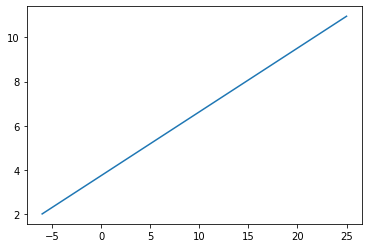

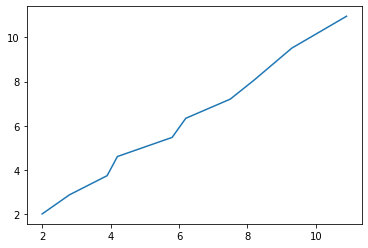

----------- CONTROL ---------------
control: 0.47547805039058094
control: 0.6895491645927656
0.6895491645927656


In [6]:
# A vous de jouer !
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as lina

#Fichier de Données
fName = "C:/Users/User/Documents/SIMPLON/workspace/jour1/2110210_data.txt"
f=open(fName,'w')
f.write('25 ;10.9\n')
f.write('20 ;9.3\n')
f.write('15 ;8.2\n')
f.write('12 ;7.5\n')
f.write('9 ;6.2\n')
f.write('6 ;5.8\n')
f.write('3 ;4.2\n')
f.write('0 ;3.9\n')
f.write('-3 ;2.8\n')
f.write('-6 ;2\n')
f.close()

# Lire le fichier
f=open(fName,'r')

lines = f.readlines()
# fermez le fichier après avoir lu les lignes
f.close()

# Initialisation des listes
abscisses = np.array([])
ordonnees = np.array([])

S1 = 0
S2 = 0
n = len(lines)

# Itérer sur les lignes
for line in lines:
    coord = line.strip().split(sep=' ;')
    # print(coord)
    abscisses = np.append(abscisses, float(coord[0]))
    ordonnees = np.append(ordonnees, float(coord[1]))
    S1 += float(coord[0])*float(coord[1])
    S2 += float(coord[0])**2
#-----------
# Calcul de la version prédictive
S1 = S1*n
S2 = S2*n
SX = np.sum(abscisses)
SY = np.sum(ordonnees)
print("-----------")
print(abscisses)
print(ordonnees)
a = (S1 - (SX * SY)) / (S2 - SX**2)
#print("a :", a)
# 𝑏=𝑦⎯⎯⎯−𝑎𝑥⎯⎯⎯ en notant 𝑥⎯⎯⎯ la moyenne des 𝑥𝑖 et 𝑦⎯⎯⎯ la moyenne des 𝑦𝑖
b = np.mean(ordonnees) - a*np.mean(abscisses)
#print("b :", b)
#print("-----------")
#y modélisé = ax + b
ordonnees2 = np.array([])

for x in abscisses:
    ordonnees2 = np.append(ordonnees2, a*x + b)


plt.plot(abscisses, ordonnees2)
plt.show()
plt.plot(ordonnees, ordonnees2)
#plt.plot(abscisses, ordonnees2, 'ro')
plt.show()
 
print("----------- CONTROL ---------------")
control = 0
i = 0
for i in range(0, n):
    control += (ordonnees[i] - ordonnees2[i])**2 
print("control:", control)
control = math.sqrt(control)
print("control:", control)

#----

dist = lina.norm(ordonnees-ordonnees2,2)
print(dist)

 y =  0.2880624931235559 x +  3.746693805699197


[]

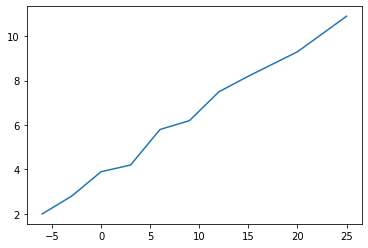

In [37]:
# Autre solution
import numpy as np
import matplotlib.pyplot as plt

#Fichier de Données
file = open('Courbe.txt','w')
données = "25;10.9\n20;9.3\n15;8.2\n12;7.5\n9;6.2\n6;5.8\n3;4.2\n0;3.9\n-3;2.8\n-6;2"
file.write(données)

# Lire le fichier

file = open('Courbe.txt','r')
x = []
y = []
lines = file.readlines()
n = len(lines)
somme_xy = 0
somme_x = 0
somme_y = 0
somme_x_carre = 0
somme_x_fois_somme_y = somme_x * somme_y

# Itérer sur les lignes
for line in lines:   
    line = line.strip().split(sep=";")
    x.append(float(line[0]))
    y.append(float(line[1]))
    
# Afficher le graphique

plt.plot(x,y)

# Calcul de la régression linéaire

for i in range(0,n) :
    somme_xy = somme_xy + x[i]*y[i]
    somme_x = somme_x + x[i]
    somme_y = somme_y + y[i]
    somme_x_carre = somme_x_carre + x[i]**2

a = (n * somme_xy - somme_x * somme_y) / (n * somme_x_carre - somme_x * somme_x)
b = somme_y / n - a * somme_x / n

# Afficher l'équation

print(" y = ",a,"x + ",b)
plt.plot() 